<a href="https://colab.research.google.com/github/anaidg/gestion_cartera/blob/main/Proyecto_Gestion_CarteraSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#carga desde drive de google

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.plotting import scatter_matrix
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Monografia/dataset_esp.txt', delimiter = "\t")

In [ ]:
df

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,Estado_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,Fecha_Inicio_Cobertura,ultimo_dia_mes,Nro_afiliados,Fecha_Limite_Pago,fecha_real_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,202002,45,20,21,5347,EN COBERTURA,0,1,431,1,2015/07/07,2020/02/29,1.0,2020/03/17,2020/03/17,877803.00,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,202006,45,20,21,5347,EN COBERTURA,0,1,235,2,2018/01/26,2020/06/30,1.0,2020/07/02,2020/07/02,1850000.00,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,202005,16,40,41,5347,EN COBERTURA,0,1,50,3,2019/10/04,2020/05/31,1.0,2020/06/12,2020/06/08,877803.00,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,202006,34,40,41,5347,EN MORA,0,1,236,5,2016/09/13,2020/06/30,1.0,2020/07/13,2020/07/09,2600000.00,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,202004,35,30,31,5347,EN MORA,0,1,236,1,2013/02/21,2020/04/30,1.0,2020/05/08,2020/05/15,1000000.00,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057792,217798798,202004,11,30,31,5347,EN MORA,0,4,103299,3,2017/03/01,2020/04/30,16.0,2020/05/12,2020/05/04,877803.00,3511212,30.0,30.0,4,85600.0,85600.0,3511212.0,3511212.0,0.0,2.436,2.436,162000.0,162000.0,1
1057793,217908019,202004,45,20,21,5347,EN COBERTURA,0,2,521963,2,2017/09/15,2020/04/30,4.0,2020/05/08,2020/05/06,1051581.50,2103164,24.5,24.5,2,18700.0,9400.0,1781302.0,1781302.0,-9300.0,1.044,0.522,0.0,0.0,0
1057794,218346934,202002,49,50,51,5346,EN COBERTURA,0,4,235,2,2019/05/01,2020/02/29,16.0,2020/03/13,2020/03/20,1072410.25,4289641,30.0,30.0,4,44900.0,22500.0,4289641.0,4289641.0,-22400.0,1.044,0.522,43400.0,0.0,1
1057795,218302244,202002,45,20,21,5346,EN COBERTURA,0,2,341,1,2019/01/31,2020/02/29,4.0,2020/03/19,2020/03/13,877803.00,1755606,30.0,30.0,2,9200.0,9200.0,1755606.0,1755606.0,0.0,0.522,0.522,0.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057797 entries, 0 to 1057796
Data columns (total 31 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1057797 non-null  int64  
 1   Mes_Id                      1057797 non-null  int64  
 2   Uen_Arp_Id                  1057797 non-null  int64  
 3   Regional_Arp_Id             1057797 non-null  int64  
 4   Oficina_Arp_Id              1057797 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1057797 non-null  int64  
 6   Estado_Empresa_Arp_Id       1057797 non-null  object 
 7   cant_siniestros             1057797 non-null  int64  
 8   cant_novedades              1057797 non-null  int64  
 9   Sector_Economico_Id         1057797 non-null  int64  
 10  clasificacion_riesgo        1057797 non-null  int64  
 11  Fecha_Inicio_Cobertura      1057797 non-null  object 
 12  ultimo_dia_mes              1057797 non-null  object 
 1

In [ ]:
# Cambiar a formato fecha, crear una nueva columna con la diferencia en días entre el último día del mes y la fecha inicial de la cobertura, y eliminar estas dos últimas variables.

import datetime

list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['Fecha_Inicio_Cobertura']))
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['ultimo_dia_mes']))

df[['Fecha_Inicio_Cobertura','ultimo_dia_mes']] = df[['Fecha_Inicio_Cobertura','ultimo_dia_mes']].apply(pd.to_datetime)
new_col = (df['ultimo_dia_mes'] - df['Fecha_Inicio_Cobertura']).dt.days
df.insert(11, 'cant_dias_cobertura', new_col)

df = df.drop('Fecha_Inicio_Cobertura', axis = 1)
df = df.drop('ultimo_dia_mes', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057797 entries, 0 to 1057796
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1057797 non-null  int64  
 1   Mes_Id                      1057797 non-null  int64  
 2   Uen_Arp_Id                  1057797 non-null  int64  
 3   Regional_Arp_Id             1057797 non-null  int64  
 4   Oficina_Arp_Id              1057797 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1057797 non-null  int64  
 6   Estado_Empresa_Arp_Id       1057797 non-null  object 
 7   cant_siniestros             1057797 non-null  int64  
 8   cant_novedades              1057797 non-null  int64  
 9   Sector_Economico_Id         1057797 non-null  int64  
 10  clasificacion_riesgo        1057797 non-null  int64  
 11  cant_dias_cobertura         1057797 non-null  int64  
 12  Nro_afiliados               1057797 non-null  float64
 1

In [ ]:
# Verificar si existe algún ? en la columna 'Fecha_Limite_Pago'

ind1= df[df['Fecha_Limite_Pago'] == '?'].index
ind1

Int64Index([], dtype='int64')

In [ ]:
# Verificar si existe algún '?' en la columna 'fecha_real_pago'

ind2 = df[df['fecha_real_pago'] == '?'].index
ind2

Int64Index([      9,      11,      14,      42,      56,      83,      92,
                 97,     105,     108,
            ...
            1057634, 1057647, 1057659, 1057662, 1057674, 1057681, 1057691,
            1057734, 1057745, 1057746],
           dtype='int64', length=56545)

In [ ]:
# Eliminar valores "faltantes" en la columna 'fecha_real_pago'(para la línea base).

df.drop(ind2, inplace=True)

In [ ]:
# Cambiar a formato fecha, crear una nueva columna con la diferencia en días entre la fecha real y la fecha límite de pago, y eliminar estas dos últimas variables.

list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['Fecha_Limite_Pago']))
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['fecha_real_pago'])) # Hay al menos un ? en esta col

df[['Fecha_Limite_Pago','fecha_real_pago']] = df[['Fecha_Limite_Pago','fecha_real_pago']].apply(pd.to_datetime)
new_col = (df['fecha_real_pago'] - df['Fecha_Limite_Pago']).dt.days
df.insert(13, 'cant_dias_pago', new_col)

df = df.drop('Fecha_Limite_Pago', axis = 1)
df = df.drop('fecha_real_pago', axis = 1)


In [ ]:
df = df.drop('Estado_Empresa_Arp_Id', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001252 entries, 0 to 1057796
Data columns (total 28 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1001252 non-null  int64  
 1   Mes_Id                      1001252 non-null  int64  
 2   Uen_Arp_Id                  1001252 non-null  int64  
 3   Regional_Arp_Id             1001252 non-null  int64  
 4   Oficina_Arp_Id              1001252 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1001252 non-null  int64  
 6   cant_siniestros             1001252 non-null  int64  
 7   cant_novedades              1001252 non-null  int64  
 8   Sector_Economico_Id         1001252 non-null  int64  
 9   clasificacion_riesgo        1001252 non-null  int64  
 10  cant_dias_cobertura         1001252 non-null  int64  
 11  Nro_afiliados               1001252 non-null  float64
 12  cant_dias_pago              1001252 non-null  int64  
 1

In [ ]:
df

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,202002,45,20,21,5347,0,1,431,1,1698,1.0,0,877803.00,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,202006,45,20,21,5347,0,1,235,2,886,1.0,0,1850000.00,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,202005,16,40,41,5347,0,1,50,3,240,1.0,-4,877803.00,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,202006,34,40,41,5347,0,1,236,5,1386,1.0,-4,2600000.00,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,202004,35,30,31,5347,0,1,236,1,2625,1.0,7,1000000.00,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057792,217798798,202004,11,30,31,5347,0,4,103299,3,1156,16.0,-8,877803.00,3511212,30.0,30.0,4,85600.0,85600.0,3511212.0,3511212.0,0.0,2.436,2.436,162000.0,162000.0,1
1057793,217908019,202004,45,20,21,5347,0,2,521963,2,958,4.0,-2,1051581.50,2103164,24.5,24.5,2,18700.0,9400.0,1781302.0,1781302.0,-9300.0,1.044,0.522,0.0,0.0,0
1057794,218346934,202002,49,50,51,5346,0,4,235,2,304,16.0,7,1072410.25,4289641,30.0,30.0,4,44900.0,22500.0,4289641.0,4289641.0,-22400.0,1.044,0.522,43400.0,0.0,1
1057795,218302244,202002,45,20,21,5346,0,2,341,1,394,4.0,-6,877803.00,1755606,30.0,30.0,2,9200.0,9200.0,1755606.0,1755606.0,0.0,0.522,0.522,0.0,0.0,0


In [ ]:
df.describe()

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
count,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06
mean,2.179925e+08,2.020035e+05,3.938780e+01,3.653640e+01,3.775126e+01,5.346334e+03,1.215558e-01,6.322652e+01,3.327150e+04,2.154709e+00,1.281972e+03,4.704437e+04,9.925194e+00,1.277054e+06,3.743654e+07,2.725197e+01,2.718431e+01,6.341927e+01,1.901134e+06,1.886419e+06,1.060896e+08,1.055060e+08,-1.471546e+04,2.002402e+00,1.931280e+00,2.901446e+04,2.798588e+04,1.825125e-01
std,3.195440e+05,1.709122e+00,1.179618e+01,1.239759e+01,1.268289e+01,1.321357e+00,1.927471e+00,1.506547e+03,9.521186e+04,1.452627e+00,1.318106e+03,4.640614e+06,4.097474e+01,1.295670e+06,5.027258e+08,5.583855e+00,5.953432e+00,1.510666e+03,4.172243e+07,4.174612e+07,3.200896e+09,3.198449e+09,9.285226e+05,2.083863e+00,2.045954e+00,4.362698e+05,4.093521e+05,3.862665e-01
min,2.174568e+08,2.020010e+05,1.000000e+00,2.000000e+01,2.100000e+01,5.343000e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-1.830000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.657040e+08,5.201907e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.177049e+08,2.020020e+05,3.400000e+01,2.000000e+01,2.100000e+01,5.346000e+03,0.000000e+00,1.000000e+00,1.930000e+02,1.000000e+00,4.350000e+02,1.000000e+00,-4.000000e+00,8.778030e+05,1.024111e+06,2.700000e+01,2.708738e+01,1.000000e+00,9.200000e+03,9.200000e+03,9.540000e+05,8.990000e+05,0.000000e+00,5.220000e-01,5.220000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.179124e+08,2.020030e+05,3.500000e+01,4.000000e+01,4.100000e+01,5.347000e+03,0.000000e+00,3.000000e+00,2.360000e+02,1.000000e+00,9.270000e+02,9.000000e+00,0.000000e+00,8.778030e+05,3.180771e+06,3.000000e+01,3.000000e+01,3.000000e+00,3.980000e+04,3.820000e+04,2.838230e+06,2.664769e+06,0.000000e+00,1.044000e+00,9.396000e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.183063e+08,2.020050e+05,4.500000e+01,4.000000e+01,4.100000e+01,5.347000e+03,0.000000e+00,9.000000e+00,3.410000e+02,3.000000e+00,1.600000e+03,8.100000e+01,8.000000e+00,1.182242e+06,1.075583e+07,3.000000e+01,3.000000e+01,9.000000e+00,1.936000e+05,1.873000e+05,9.855606e+06,9.570122e+06,0.000000e+00,2.436000e+00,2.436000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.185126e+08,2.020060e+05,5.900000e+01,6.000000e+01,6.200000e+01,5.347000e+03,4.860000e+02,3.115760e+05,5.219630e+05,5.000000e+00,9.222000e+03,1.546746e+09,4.340000e+02,8.371905e+07,1.782963e+11,4.500000e+01,9.000000e+01,3.124720e+05,1.194490e+10,1.208371e+10,1.364237e+12,1.364313e+12,2.760416e+08,6.960000e+00,7.733333e+00,1.232977e+08,1.232977e+08,1.000000e+00


In [ ]:
df.corr()

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
id,1.000000,-0.002401,0.075101,0.023578,0.024369,0.117983,-0.035554,-0.035358,-0.011889,0.008146,-0.768889,-0.011943,0.010414,-0.092199,-0.058069,0.000214,0.006579,-0.035341,-0.041280,-0.041188,-0.032902,-0.032859,0.003073,0.017807,0.017978,0.005597,0.004022,0.062706
Mes_Id,-0.002401,1.000000,-0.000929,-0.000837,-0.000853,-0.002844,-0.001266,-0.001442,0.000510,-0.001035,0.041423,-0.000591,-0.038288,0.012608,-0.001790,0.041321,0.021502,-0.001469,-0.002953,-0.003039,-0.000890,-0.000937,-0.003918,-0.005893,-0.016329,0.008004,0.012331,0.034773
Uen_Arp_Id,0.075101,-0.000929,1.000000,0.242514,0.259035,0.118999,-0.083027,-0.066846,-0.025241,-0.085701,-0.108713,-0.022326,-0.044583,-0.111562,-0.106972,0.039047,0.040128,-0.066849,-0.079094,-0.078857,-0.060104,-0.060038,0.008628,-0.084169,-0.077908,-0.011172,-0.011552,0.015585
Regional_Arp_Id,0.023578,-0.000837,0.242514,1.000000,0.999332,-0.003734,-0.004181,-0.007377,0.003683,0.083490,-0.036763,-0.004771,0.038042,-0.006773,-0.009753,-0.006436,-0.021427,-0.007368,-0.006761,-0.006848,-0.008470,-0.008531,-0.004076,0.080602,0.072538,0.017498,0.018132,0.056452
Oficina_Arp_Id,0.024369,-0.000853,0.259035,0.999332,1.000000,-0.004115,-0.004228,-0.007461,0.002603,0.084011,-0.037580,-0.004786,0.037881,-0.009142,-0.009941,-0.006847,-0.021623,-0.007452,-0.006926,-0.007013,-0.008569,-0.008629,-0.004092,0.080971,0.073113,0.017380,0.017997,0.055760
Tamano_Empresa_Arp_Id,0.117983,-0.002844,0.118999,-0.003734,-0.004115,1.000000,-0.069083,-0.043512,-0.019557,-0.144625,-0.165595,-0.010268,-0.120044,-0.071022,-0.078815,0.162518,0.156443,-0.043527,-0.048279,-0.047857,-0.034715,-0.034547,0.017743,-0.144391,-0.133225,-0.035652,-0.037313,0.099769
cant_siniestros,-0.035554,-0.001266,-0.083027,-0.004181,-0.004228,-0.069083,1.000000,0.531117,-0.008364,0.027185,0.066130,0.361224,0.076919,0.010622,0.472775,-0.016712,-0.015412,0.531702,0.511021,0.508589,0.396568,0.396005,-0.096288,0.020571,0.021106,0.005991,0.007549,-0.018061
cant_novedades,-0.035358,-0.001442,-0.066846,-0.007377,-0.007461,-0.043512,0.531117,1.000000,0.006500,0.005476,0.074812,0.843042,0.085078,0.014640,0.770886,-0.015175,-0.014044,0.999980,0.751977,0.749328,0.801164,0.800475,-0.099898,-0.000250,-0.000615,0.003188,0.003418,-0.010002
Sector_Economico_Id,-0.011889,0.000510,-0.025241,0.003683,0.002603,-0.019557,-0.008364,0.006500,1.000000,0.011324,0.001417,0.006411,-0.000950,0.104970,0.013849,0.015623,0.014436,0.006468,0.002378,0.002420,0.009557,0.009555,0.001945,0.015077,0.015252,-0.001196,-0.001222,-0.011513
clasificacion_riesgo,0.008146,-0.001035,-0.085701,0.083490,0.084011,-0.144625,0.027185,0.005476,0.011324,1.000000,-0.013883,-0.001399,0.065213,-0.027947,0.011848,-0.189112,-0.193832,0.005495,0.026504,0.026200,0.002797,0.002757,-0.012990,0.797732,0.732906,0.076917,0.078946,0.016615


Matriz de correlacion entre variables numericas


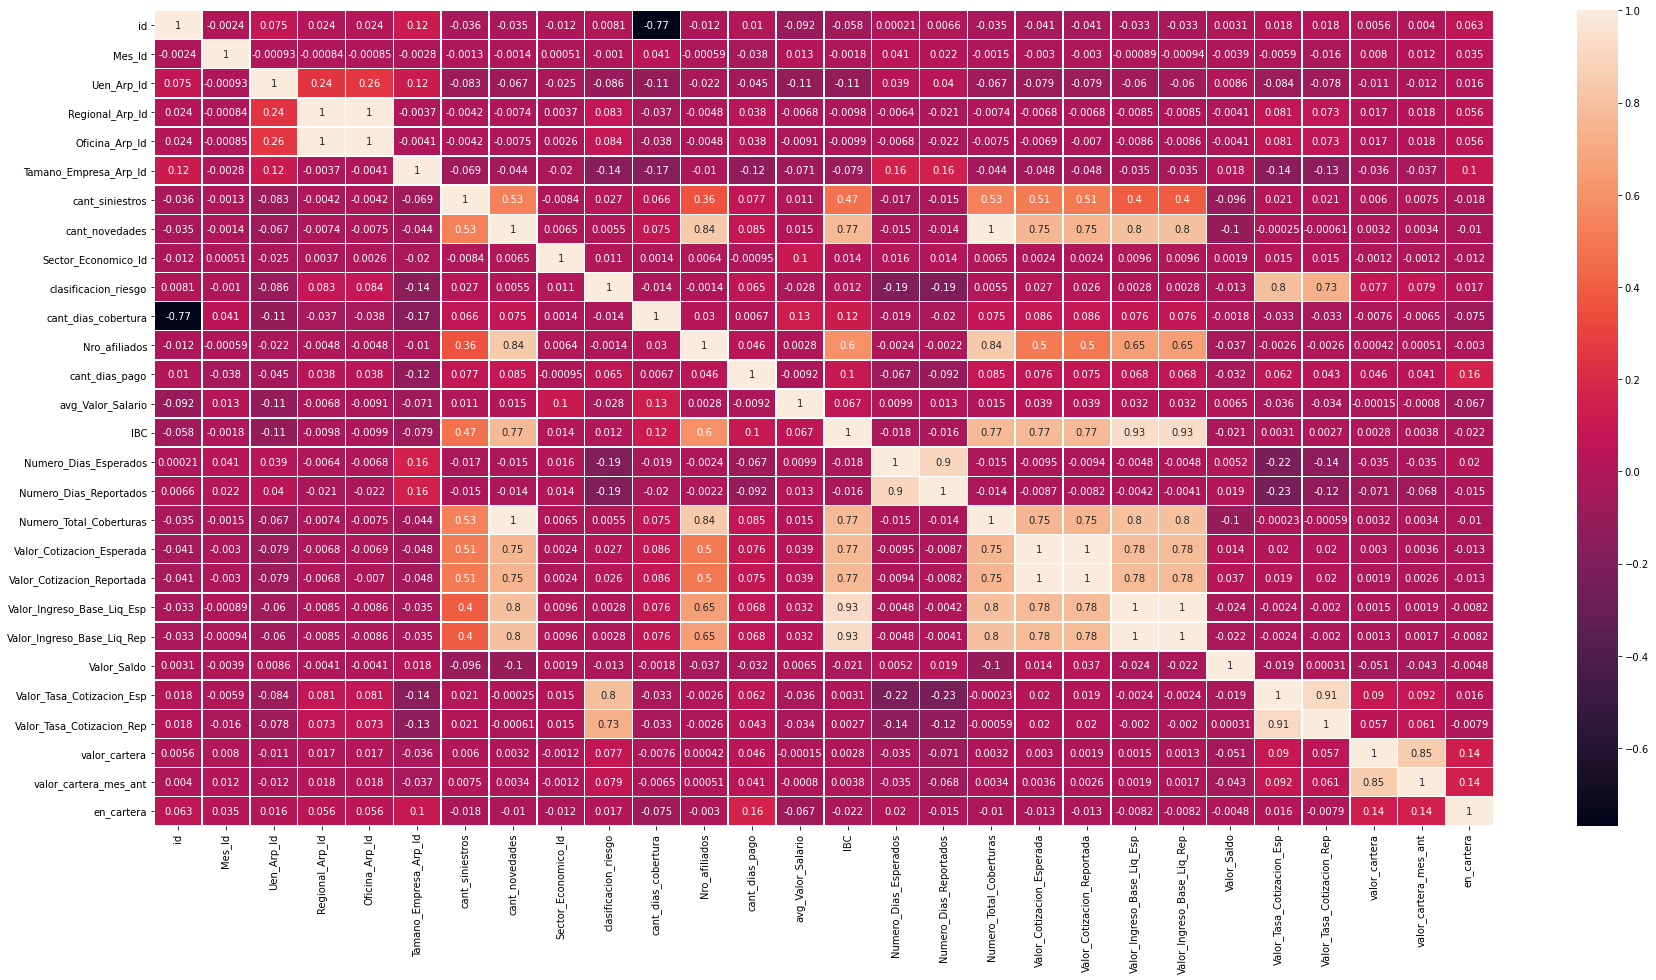

In [ ]:
plt.figure(figsize = (30,15))

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5);

cantidad de registros unicos por mes, se busca que sean las mismos id de registros mes a mes.

Nota: Como la intención es mirar el comportamiento de los pagos de empresas, se toman datos en el intervalo de tiempo de 2020-01-01 y 2020-06-31, para tener muestras pre-pandemia y pandemia.

In [ ]:
dg = df.groupby(['Mes_Id'])['id'].count()
dg

Mes_Id
202001    169060
202002    167369
202003    167006
202004    166455
202005    165676
202006    165686
Name: id, dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

id                            0
Mes_Id                        0
Uen_Arp_Id                    0
Regional_Arp_Id               0
Oficina_Arp_Id                0
Tamano_Empresa_Arp_Id         0
Estado_Empresa_Arp_Id         0
cant_siniestros               0
cant_novedades                0
Sector_Economico_Id           0
clasificacion_riesgo          0
cant_dias_cobertura           0
Nro_afiliados                 0
cant_dias_pago                0
avg_Valor_Salario             0
IBC                           0
Numero_Dias_Esperados         0
Numero_Dias_Reportados        0
Numero_Total_Coberturas       0
Valor_Cotizacion_Esperada     0
Valor_Cotizacion_Reportada    0
Valor_Ingreso_Base_Liq_Esp    0
Valor_Ingreso_Base_Liq_Rep    0
Valor_Saldo                   0
Valor_Tasa_Cotizacion_Esp     0
Valor_Tasa_Cotizacion_Rep     0
valor_cartera                 0
valor_cartera_mes_ant         0
en_cartera                    0
dtype: int64

In [ ]:
#df.isnull().sum().sum()

In [ ]:
dupl = df.duplicated()
print(dupl.sum())
#df[dupl]

0


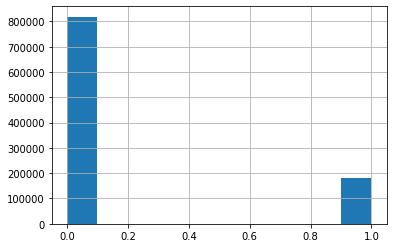

In [ ]:
df['en_cartera'].hist()
#Tener los mismos registros todos los meses?

In [ ]:
# scatter plot matrix
scatter_matrix(final)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [ ]:
# Aplicar OHE (método 1)
#dumm = pd.get_dummies(df['Estado_Empresa_Arp_Id'])
#df = df.drop('Estado_Empresa_Arp_Id', axis = 1)
#df = df.join(dumm)
#df.head(10)

# Aplicar OHE (método 2)
#df = df.drop('Estado_Empresa_Arp_Id', 1).join(pd.get_dummies(pd.DataFrame(df['Estado_Empresa_Arp_Id'].tolist()).stack()).astype(int).sum(level=0))

In [ ]:
from sklearn.preprocessing import LabelEncoder #Codificar sólo las categóricas

LE = LabelEncoder()

columns = ['Mes_Id', 'Uen_Arp_Id', 'Uen_Arp_Id', 'Regional_Arp_Id', 'Oficina_Arp_Id', 'Tamano_Empresa_Arp_Id', 'Sector_Economico_Id', 'clasificacion_riesgo']

for col in columns:
  df[col] = LE.fit_transform(df[col])

In [ ]:
df.head()

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,Estado_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,1,21,0,0,4,0,0,1,20,0,1698,1.0,0,877803.0,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,5,21,0,0,4,0,0,1,13,1,886,1.0,0,1850000.0,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,4,13,2,2,4,0,0,1,4,2,240,1.0,-4,877803.0,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,5,19,2,2,4,1,0,1,14,4,1386,1.0,-4,2600000.0,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,3,20,1,1,4,1,0,1,14,0,2625,1.0,7,1000000.0,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001252 entries, 0 to 1057796
Data columns (total 29 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1001252 non-null  int64  
 1   Mes_Id                      1001252 non-null  int64  
 2   Uen_Arp_Id                  1001252 non-null  int64  
 3   Regional_Arp_Id             1001252 non-null  int64  
 4   Oficina_Arp_Id              1001252 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1001252 non-null  int64  
 6   Estado_Empresa_Arp_Id       1001252 non-null  int64  
 7   cant_siniestros             1001252 non-null  int64  
 8   cant_novedades              1001252 non-null  int64  
 9   Sector_Economico_Id         1001252 non-null  int64  
 10  clasificacion_riesgo        1001252 non-null  int64  
 11  cant_dias_cobertura         1001252 non-null  int64  
 12  Nro_afiliados               1001252 non-null  float64
 1

In [ ]:
df2 = df.copy()
X = df2.drop(['id', 'en_cartera'], axis=1)
y = df2['en_cartera']
X, y

(         Mes_Id  Uen_Arp_Id  ...  valor_cartera  valor_cartera_mes_ant
 0             1          21  ...            0.0                    0.0
 1             5          21  ...            0.0                    0.0
 2             4          13  ...            0.0                    0.0
 3             5          19  ...            0.0                13600.0
 4             3          20  ...         5300.0                    0.0
 ...         ...         ...  ...            ...                    ...
 1057792       3           8  ...       162000.0               162000.0
 1057793       3          21  ...            0.0                    0.0
 1057794       1          22  ...        43400.0                    0.0
 1057795       1          21  ...            0.0                    0.0
 1057796       0          20  ...            0.0                    0.0
 
 [1001252 rows x 26 columns], 0          0
 1          0
 2          0
 3          1
 4          1
           ..
 1057792    1
 105779

In [ ]:
X.shape

(1001252, 26)

In [ ]:
y.shape

(1001252,)

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split #K-Fold

# Prueba 1
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Prueba 2 (Validación)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

# Prueba 3 (Estratificación)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Prueba 4 (Validación + Estratificación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler #Escalar sólo las numéricas

SS = StandardScaler()

col_names = ['cant_siniestros', 'cant_novedades', 'Nro_afiliados', 'avg_Valor_Salario', 'IBC', 'Numero_Dias_Esperados', 'Numero_Dias_Reportados', 'Numero_Total_Coberturas', 'Valor_Cotizacion_Esperada', 'Valor_Cotizacion_Reportada', 'Valor_Ingreso_Base_Liq_Esp', 'Valor_Ingreso_Base_Liq_Rep', 'Valor_Saldo', 'Valor_Tasa_Cotizacion_Esp', 'Valor_Tasa_Cotizacion_Rep', 'valor_cartera', 'valor_cartera_mes_ant', 'cant_dias_pago', 'cant_dias_cobertura']

scaler = StandardScaler().fit(X_train[col_names].values)

X_train[col_names] = scaler.transform(X_train[col_names].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
#from sklearn.preprocessing import StandardScaler #Escalar sólo las numéricas

#SS = StandardScaler()

#col_names = ['cant_siniestros', 'cant_novedades', 'Nro_afiliados', 'avg_Valor_Salario', 'IBC', 'Numero_Dias_Esperados', 'Numero_Dias_Reportados', 'Numero_Total_Coberturas', 'Valor_Cotizacion_Esperada', 'Valor_Cotizacion_Reportada', 'Valor_Ingreso_Base_Liq_Esp', 'Valor_Ingreso_Base_Liq_Rep', 'Valor_Saldo', 'Valor_Tasa_Cotizacion_Esp', 'Valor_Tasa_Cotizacion_Rep', 'valor_cartera', 'valor_cartera_mes_ant', 'cant_dias_pago', 'cant_dias_cobertura']

#scaler = SS.fit(X_test[col_names].values)

X_test[col_names] = scaler.transform(X_test[col_names].values)

In [ ]:
#from sklearn.preprocessing import StandardScaler #Escalar sólo las numéricas

#SS = StandardScaler()

#col_names = ['cant_siniestros', 'cant_novedades', 'Nro_afiliados', 'avg_Valor_Salario', 'IBC', 'Numero_Dias_Esperados', 'Numero_Dias_Reportados', 'Numero_Total_Coberturas', 'Valor_Cotizacion_Esperada', 'Valor_Cotizacion_Reportada', 'Valor_Ingreso_Base_Liq_Esp', 'Valor_Ingreso_Base_Liq_Rep', 'Valor_Saldo', 'Valor_Tasa_Cotizacion_Esp', 'Valor_Tasa_Cotizacion_Rep', 'valor_cartera', 'valor_cartera_mes_ant', 'cant_dias_pago', 'cant_dias_cobertura']

#scaler = SS.fit(X_val[col_names].values)

X_val[col_names] = scaler.transform(X_val[col_names].values)

In [ ]:
X_train

,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant
399331,1,21,0,0,4,-0.062529,-0.039862,17,0,1.982497,-0.010215,-0.144539,-0.307277,-0.067917,0.491704,0.472424,-0.039876,-0.043786,-0.043405,-0.030877,-0.030727,0.015211,-0.710445,-0.688965,-0.068472,-0.070168
474386,0,28,3,5,4,-0.062529,-0.039216,1,4,-0.096053,-0.010214,-0.315246,-0.345561,-0.065995,-0.105416,-0.087715,-0.039232,-0.043699,-0.043318,-0.030666,-0.030516,0.015211,-0.710445,-0.688965,-0.068472,-0.070168
1037430,2,20,1,1,4,-0.062529,-0.037280,10,1,-0.121095,-0.010214,0.050555,-0.307277,-0.066253,0.491704,0.472424,-0.037300,-0.043363,-0.042982,-0.029850,-0.029700,0.015211,-0.710445,-0.688965,-0.068472,-0.070168
609919,4,23,3,4,4,-0.062529,-0.040507,14,0,-0.752477,-0.010216,-0.632273,-0.307277,-0.069581,0.491704,0.472424,-0.040520,-0.043892,-0.043511,-0.031133,-0.030984,0.015211,-0.710445,-0.688965,-0.068472,-0.070168
261793,2,22,3,3,4,-0.062529,-0.036634,7,1,1.812510,-0.010206,-0.315246,-0.144330,-0.053698,0.184614,0.184353,-0.036657,-0.034679,-0.034308,-0.028851,-0.028701,0.015211,1.496989,1.559166,-0.068472,-0.070168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44319,4,22,3,3,4,-0.062529,-0.038571,12,0,-0.653823,-0.010215,0.001782,-0.221676,-0.066964,-2.105767,-1.964181,-0.038588,-0.043602,-0.043341,-0.030730,-0.030580,0.009768,-0.647802,-0.688965,-0.068472,-0.070168
668606,4,13,2,2,4,-0.062529,-0.040507,21,3,-0.353310,-0.010216,-0.973687,-0.307277,-0.069581,0.491704,0.472424,-0.040520,-0.043119,-0.042739,-0.031133,-0.030984,0.015211,1.127095,1.182452,-0.068472,-0.070168
585294,1,22,3,3,4,-0.062529,-0.037280,1,4,0.007154,-0.010208,-0.217699,-0.307277,-0.067307,-2.762599,-2.580334,-0.037300,-0.040667,-0.040289,-0.030782,-0.030633,0.015211,2.379963,2.458418,-0.068472,-0.070168
301803,1,22,3,3,1,-0.062529,0.033734,4,4,-0.420850,-0.007701,1.172344,-0.307277,0.096545,-0.759159,-0.696432,0.033521,-0.011594,-0.012409,-0.008548,-0.008948,-0.037647,0.070077,0.093929,-0.068472,-0.070168


In [ ]:
X_test

,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant
240649,0,21,0,0,4,-0.062529,-0.039862,0,2,-0.854165,-0.010215,-0.559113,-0.202293,-0.067306,0.491704,0.472424,-0.039876,-0.042831,-0.042451,-0.030782,-0.030633,0.015211,0.208325,0.246744,-0.068472,-0.070168
844978,2,21,0,0,3,-0.062529,-0.040507,14,0,-0.514191,-0.010216,1.782012,-0.307277,-0.069581,0.491704,0.472424,-0.040520,-0.043892,-0.043511,-0.031133,-0.030984,0.015211,-0.710445,-0.688965,-0.057520,-0.070168
113290,3,22,3,3,4,-0.062529,-0.037925,1,4,-0.760824,-0.010211,0.782157,-0.134347,-0.062462,0.491704,0.472424,-0.037944,-0.035167,-0.043058,-0.029779,-0.029885,-0.360864,2.379963,-0.688965,-0.068472,-0.070168
898659,2,21,0,0,4,-0.062529,-0.035988,14,0,-0.707703,-0.010203,-0.339632,0.256320,-0.047037,0.200608,0.199357,-0.036013,-0.042495,-0.042115,-0.027763,-0.027612,0.015211,-0.710445,-0.688965,-0.068472,-0.070168
935736,2,32,4,7,4,-0.062529,-0.040507,14,0,-0.560482,-0.010216,-0.681046,-0.307277,-0.069581,0.491704,0.472424,-0.040520,-0.043892,-0.043511,-0.031133,-0.030984,0.015211,-0.710445,-0.688965,-0.068472,-0.070168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540523,4,21,0,0,4,-0.062529,-0.035343,1,4,-0.812428,-0.010199,-0.485953,0.370472,-0.042870,-0.085512,-0.069043,-0.035369,-0.036618,-0.036244,-0.027013,-0.026862,0.015211,1.006448,1.059581,-0.068472,-0.070168
139174,2,21,0,0,4,-0.062529,-0.033406,14,0,4.870763,-0.010186,-0.364019,0.115097,-0.038807,0.372280,0.360397,-0.033437,-0.041959,-0.041580,-0.026455,-0.026303,0.015211,-0.710445,-0.688965,-0.068472,-0.070168
19977,5,15,3,3,0,-0.062529,-0.016621,18,0,0.593003,-0.009955,0.148102,-0.284523,-0.015869,-0.408690,-0.372206,-0.016698,-0.020448,-0.020092,-0.022943,-0.022788,0.015211,1.061154,1.115296,-0.068472,-0.070168
752951,5,19,2,2,4,-0.062529,-0.039216,22,0,-0.281976,-0.010214,-0.437179,-0.076950,-0.064553,0.491704,0.472424,-0.039232,-0.043572,-0.043192,-0.030358,-0.030208,0.015211,-0.710445,-0.688965,-0.068472,-0.070168


In [ ]:
X_val

,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,Nro_afiliados,cant_dias_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant
579142,5,19,2,2,4,-0.062529,-0.040507,1,4,-0.203053,-0.010216,-0.071378,-0.307277,-0.069581,0.491704,0.472424,-0.040520,-0.042592,-0.043511,-0.031133,-0.030984,-0.043927,2.379963,-0.688965,-0.068472,0.097173
603819,5,19,2,2,4,-0.062529,-0.040507,14,0,-0.736540,-0.010216,-0.656660,-0.307277,-0.069581,0.491704,0.472424,-0.040520,-0.043892,-0.043511,-0.031133,-0.030984,0.015211,-0.710445,-0.688965,-0.068472,-0.070168
53554,0,21,0,0,1,0.450656,0.041481,9,2,0.134644,-0.009336,-0.266472,0.003295,0.092669,-0.154865,-0.134101,0.041247,0.037828,0.043195,0.014271,0.014451,0.246110,0.208325,0.275984,-0.068472,-0.070168
302914,0,19,2,2,4,-0.062529,-0.040507,14,0,2.155520,-0.010216,0.416356,-0.345561,-0.069581,0.491704,0.472424,-0.040520,-0.043892,-0.043511,-0.031133,-0.030984,0.015211,-0.710445,-0.688965,-0.057996,-0.058961
19243,4,19,2,2,4,-0.062529,-0.039216,14,0,-0.096053,-0.010214,-0.412792,0.231968,-0.062273,-0.821960,-0.759882,-0.039232,-0.043513,-0.043132,-0.030222,-0.030072,0.015211,-0.710445,-0.688965,-0.068472,-0.070168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963453,5,23,3,4,4,-0.062529,-0.033406,7,3,-0.415538,-0.010186,0.001782,-0.299431,-0.051045,0.491704,0.472424,-0.033437,-0.033323,-0.032954,-0.028274,-0.028123,0.015211,1.127095,1.182452,-0.068472,-0.070168
12170,0,3,0,0,4,0.450656,0.051810,13,1,1.177334,-0.009796,-0.217699,-0.309843,0.027849,-0.135272,-0.221195,0.051548,0.009339,0.008284,0.013087,0.011983,-0.047590,-0.228439,-0.241924,-0.068472,-0.070168
350595,2,21,0,0,4,-0.062529,-0.040507,14,0,-0.747165,-0.010215,-0.388406,-0.307277,-0.069581,0.491704,0.472424,-0.040520,-0.043892,-0.043511,-0.031133,-0.030984,0.015211,-0.710445,-0.688965,-0.068472,0.234968
309771,5,22,3,3,4,-0.062529,-0.040507,17,0,-0.580972,-0.010216,-0.510339,-0.307277,-0.069581,0.491704,0.472424,-0.040520,-0.043892,-0.043511,-0.031133,-0.030984,0.015211,-0.710445,-0.688965,-0.068472,-0.070168


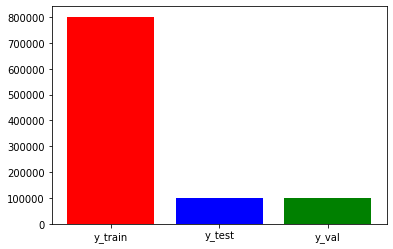

In [ ]:
# Distribución de las etiquetas - Aplica sólo para Prueba 2 (Validación)

import matplotlib.pyplot as plt

u = ['y_train', 'y_test', 'y_val']
v = [y_train.shape[0], y_test.shape[0], y_val.shape[0]]

plt.bar(u, v, color=['red', 'blue', 'green'])
plt.show()

#print(y_train.shape)
#print(y_test.shape)
#print(y_val.shape)

#print(y_train.value_counts())
#print(y_test.value_counts())
#print(y_val.value_counts())

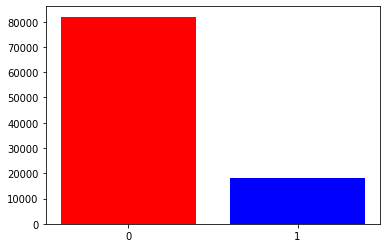

In [ ]:
# Distribución de las etiquetas en el conjunto de testeo

u = ['0', '1']
v = [y_test.value_counts()[0], y_test.value_counts()[1]]

plt.bar(u, v, color=['red', 'blue'])
plt.show()

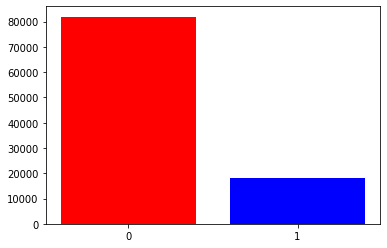

In [ ]:
# Distribución de las etiquetas en el conjunto de validación - Aplica sólo para Prueba 2 (Validación)

u = ['0', '1']
v = [y_val.value_counts()[0], y_val.value_counts()[1]]

plt.bar(u, v, color=['red', 'blue'])
plt.show()

In [ ]:
# Entrenar los modelos

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
#SVM (varios kernel), otros 

clf1 = RandomForestClassifier().fit(X_train, y_train)
clf2 = GradientBoostingClassifier().fit(X_train, y_train)
clf3 = LGBMClassifier().fit(X_train, y_train)

In [ ]:
# Calcular el score de testeo

print(clf1.score(X_test, y_test))
print(clf2.score(X_test, y_test))
print(clf3.score(X_test, y_test))

1.0
1.0
1.0


In [ ]:
# Calcular el score de validación

print(clf1.score(X_val, y_val))
print(clf2.score(X_val, y_val))
print(clf3.score(X_val, y_val))

1.0
1.0
1.0


In [ ]:
# Si se estratificara...
#from sklearn.model_selection import ShuffleSplit

#st = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#st = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

##st = KFold(n_splits=10, n_folds=5, shuffle=True, random_state=None)

In [ ]:
# Si se estratificara...
#from sklearn.model_selection import cross_val_score

#scores1 = cross_val_score(clf1, X, y, cv=5)
#print("Score de validación 1: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

#scores2 = cross_val_score(clf2, X, y, cv=5)
#print("Score de validación 2: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

#scores3 = cross_val_score(clf3, X, y, cv=5)
#print("Score de validación 2: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

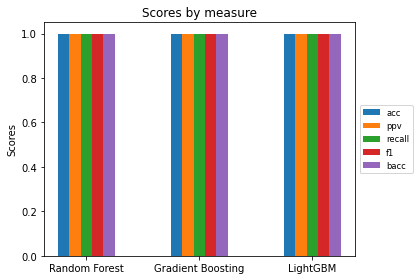

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

labels = ['Random Forest', 'Gradient Boosting', 'LightGBM']
measures = ['acc','ppv','recall','f1','bacc']
Performance = []
Performance.append([accuracy_score(y_test,clf1.predict(X_test)), accuracy_score(y_test,clf2.predict(X_test)), accuracy_score(y_test,clf3.predict(X_test))])
Performance.append([precision_score(y_test,clf1.predict(X_test)), precision_score(y_test,clf2.predict(X_test)), precision_score(y_test,clf3.predict(X_test))])
Performance.append([recall_score(y_test,clf1.predict(X_test)), recall_score(y_test,clf2.predict(X_test)), recall_score(y_test,clf3.predict(X_test))])
Performance.append([f1_score(y_test,clf1.predict(X_test)), f1_score(y_test,clf2.predict(X_test)), f1_score(y_test,clf3.predict(X_test))])
Performance.append([balanced_accuracy_score(y_test,clf1.predict(X_test)), balanced_accuracy_score(y_test,clf2.predict(X_test)), balanced_accuracy_score(y_test,clf3.predict(X_test))])

x = np.arange(len(labels))*2  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width+0.3 -0.7, Performance[i],width, label=measures[i])
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1,loc='center right', fontsize='small',bbox_to_anchor=(1.2, 0.5))
fig.tight_layout()
plt.show()

[[1. 0.]
 [0. 1.]]


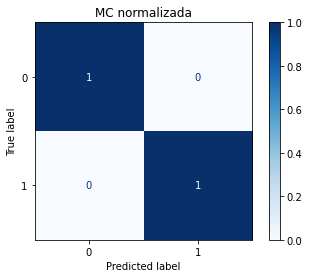

In [ ]:
#Graficar la matriz de confusión normalizada

from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf1, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada')

print(disp.confusion_matrix)

plt.show()

[[1. 0.]
 [0. 1.]]


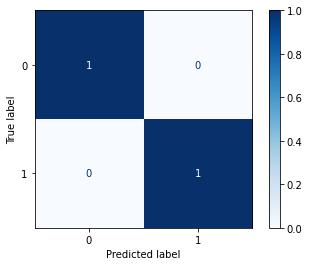

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf1, X_val, y_val, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

print(disp.confusion_matrix)

plt.show()

[[1. 0.]
 [0. 1.]]


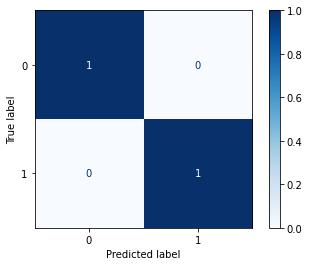

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf2, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

print(disp.confusion_matrix)

plt.show()

[[1. 0.]
 [0. 1.]]


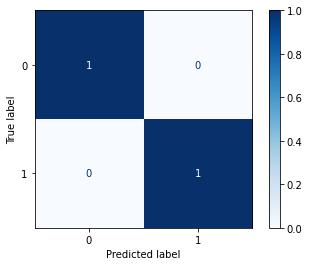

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf2, X_val, y_val, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

print(disp.confusion_matrix)

plt.show()

[[1.         0.        ]
 [0.19788427 0.80211573]]


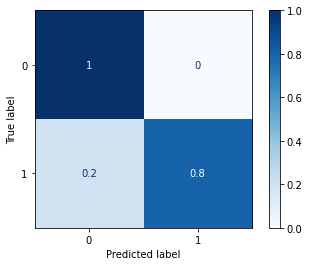

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf3, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

print(disp.confusion_matrix)

plt.show()

In [ ]:
# Standard Bagging (bagged decision trees on an imbalanced classification problem)

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 1.000


0.18410259141875515
Mean ROC AUC: 1.000
[[0. 1.]
 [0. 1.]]


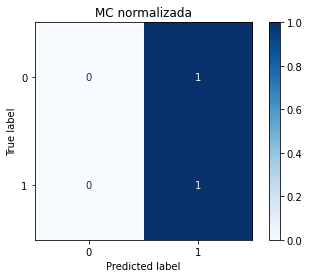

In [ ]:
clf4 = BaggingClassifier().fit(X_train, y_train)

print(clf4.score(X_test, y_test))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf4, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

disp = plot_confusion_matrix(clf4, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada')
print(disp.confusion_matrix)
plt.show()

In [ ]:
# Bagging with Random Undersampling (bagged decision trees with random undersampling for imbalanced classification)

from imblearn.ensemble import BalancedBaggingClassifier

model = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

Mean ROC AUC: 1.000


In [ ]:
# random forest for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = RandomForestClassifier(n_estimators=10)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

0.18410259141875515
Mean ROC AUC: 1.000
[[0. 1.]
 [0. 1.]]


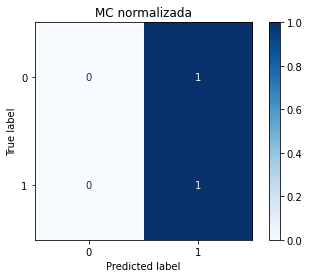

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf5 = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

print(clf5.score(X_test, y_test))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf5, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

disp = plot_confusion_matrix(clf5, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada')
print(disp.confusion_matrix)
plt.show()